In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像データの読み込み
img1 = cv2.imread('./data/image1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('./data/image2.png', cv2.IMREAD_GRAYSCALE)

list_1 = np.arange(0)
for i in range(0,512):
    list_1 = np.append(list_1, img1[i], axis=0)
print(list_1)

list_2 = np.arange(0)
for i in range(0,512):
    list_2 = np.append(list_2, img2[i], axis=0)
print(list_2)

[179 179 179 ... 142 142 142]
[173 173 173 ... 130 130 132]


In [5]:
list_1 = list_1 - np.average(list_1)
list_2 = list_2 - np.average(list_2)
x = np.append([list_1], [list_2], axis=0)
print(x)

[[47.78063202 47.78063202 47.78063202 ... 10.78063202 10.78063202
  10.78063202]
 [44.24161911 44.24161911 44.24161911 ...  1.24161911  1.24161911
   3.24161911]]


In [6]:
#共分散行列
cov = np.cov(x, rowvar=1, bias=1)
print(cov)

#固有値分解
eig, E = np.linalg.eig(cov)#固有値、固有ベクトル
print(eig)
eig[0] = 1/np.sqrt(eig[0])
eig[1] = 1/np.sqrt(eig[1])
D=np.diag(eig)#対角化
print(D)
print(E)
print(np.dot(E, E.T))

#新しい確率変数の導入
V = np.dot(np.dot(E, D), E.T)
print(V)

z = np.dot(V, x)
print(z)

covz = np.cov(z, rowvar=1, bias=1)
print(covz)

#yの尖度の絶対値を最大化
import math
prew1 = np.array([0, 0])
w1 = np.array([1, 0])
count = 0

while (math.isclose(prew1[0], w1[0]) == False or math.isclose(prew1[1], w1[1]) == False) and count < 100:
    prew1 = w1
    w1 = np.dot(z, np.dot(w1, z)**3)/(512*512)-3*w1.T
    w1 = w1/np.linalg.norm(w1)
    if w1[0]<0:w1 = -w1
    count += 1

prew2 = np.array([0, 0])
w2 = np.array([0,1])
count = 0

while (math.isclose(prew2[0], w2[0]) == False or math.isclose(prew2[1], w2[1]) == False) and count < 100:
    prew2 = w2
    w2 = np.dot(z, np.dot(w2, z)**3)/(512*512)-3*w2.T
    w2 = w2/np.linalg.norm(w2)
    if w2[0]<0:w2 = -w2
    count += 1

W = np.append([w1], [w2], axis=0)
print(W)
y = np.dot(W, z)
print(y)

[[1160.76256189 1089.98722667]
 [1089.98722667 1194.79674945]]
[  87.65959999 2267.89971135]
[[0.10680713 0.        ]
 [0.         0.02099849]]
[[-0.71260448 -0.701566  ]
 [ 0.701566   -0.71260448]]
[[1.00000000e+00 2.17987646e-17]
 [2.17987646e-17 1.00000000e+00]]
[[ 0.06457256 -0.04289909]
 [-0.04289909  0.06323306]]
[[ 1.18739242  1.18739242  1.18739242 ...  0.64286868  0.64286868
   0.5570705 ]
 [ 0.74778728  0.74778728  0.74778728 ... -0.38396796 -0.38396796
  -0.25750184]]
[[1.00000000e+00 1.33044617e-14]
 [1.33044617e-14 1.00000000e+00]]
[[ 0.99858361 -0.0532051 ]
 [ 0.03361483 -0.99943486]]
[[ 1.1459245   1.1459245   1.1459245  ...  0.66238718  0.66238718
   0.56998188]
 [-0.70745068 -0.70745068 -0.70745068 ...  0.40536089  0.40536089
   0.27608214]]


In [7]:
y0 = y[0] - np.amin(y[0])
y1 = y[1] - np.amin(y[1])

y0 = y0 / np.amax(y0)*255
y1 = -y1 / np.amax(y1)*255

from PIL import Image
y0 = Image.fromarray(y0.astype(np.uint8))
y1 = Image.fromarray(y1.astype(np.uint8))

img1ans = np.reshape(y0, (512,512))
img2ans = np.reshape(y1, (512,512))
print(img1ans)
print(img2ans)

[[193 193 193 ... 105  83  85]
 [193 193 193 ... 101  96  79]
 [193 193 193 ... 104  89  92]
 ...
 [ 75  75  71 ... 177 182 178]
 [ 75  75  68 ... 170 170 165]
 [  0  75  68 ... 170 170 165]]
[[157 157 157 ... 176 157 130]
 [157 157 157 ... 171 159 122]
 [157 157 157 ... 169 158 125]
 ...
 [ 28  28  36 ...  92  86  87]
 [ 28  28  45 ...  96  96 103]
 [ 35  28  45 ...  96  96 103]]


In [8]:
import os
import cv2

cv2.imwrite("./ans/image1ans.png", img1ans)
cv2.imwrite("./ans/image2ans.png", img2ans)

True

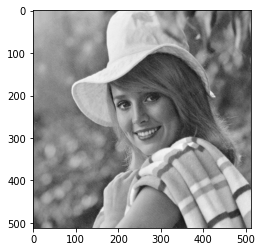

In [9]:
plt.imshow(img1ans, cmap="gray")

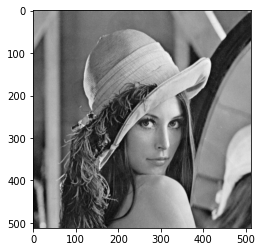

In [10]:
plt.imshow(img2ans, cmap="gray")